# Type Ia supernovae and data analysis

## Python syntax

* Indentations are mandatory in Python
* Common mathematical operations are :
    + `+,-,*,/` and `**`
    + can be combined with `=` for instance to increment a variable `i += 1`
* Numpy library contains a lot of useful mathematical functions such as :
    + `np.sqrt(  )`, `np.exp(   )`, `np.log(  )`, `np.log10(   )` 
    + statistics of an array : `np.mean(  )`, `np.std(   )`
    + sum of array elements : `np.sum(   )`

## Magnitudes and standard candles

The magnitude is a logarithmic scale that measures the brightness of an object observed from Earth. It is based on the measurement of flux $F_{\rm obs}$ measured with a telescope and compared with a reference flux $F_{\rm ref}$ that fixes the scale. The latter generally relies on a standard star, Vega in the Lyra constellation. The notion of magnitude is linked to the spectral bandwidth of the instrument.

The brightness of an object can be expressed in terms of its absolute magnitude. This quantity is derived from the logarithm of its luminosity $L$ as seen from a distance of $10\,$parsecs.

The apparent magnitude $m_B(z)$ in the filter $b$, or the magnitude as seen by the observer, is defined for historical reasons as:
\begin{equation}
m_b(z) = -2.5\log_{10} \left[\frac{F_{\rm obs}}{F_{\rm ref}} \right]
\end{equation}


The absolute magnitude $m_B(z)$ in the filter $B$, or the magnitude as seen by the observer, is defined for historical reasons as:
\begin{equation}
M_B = -2.5 \log_{10} \frac{F_{\rm obs}(10\,\mathrm{pc})}{F_{\rm ref}} =  -2.5 \log_{10} \frac{L}{4\pi (10\,\mathrm{pc})^2 F_{\rm ref}}
\end{equation}

\begin{align*}
m_b(z) & = -2.5\log_{10} \left[\frac{F_{\rm obs}}{F_{\rm ref}} \right] =  5 \log_{10} \frac{D_L(z)}{10\,\mathrm{pc}}  + M_B  + K_{bB} \\
\end{align*}

We define the B-band rest-frame magnitude as:
\begin{align*}
m_B^* = m_b - K_{bB}
\end{align*}
and the luminosity distance:
\begin{equation}
D_L(z) =  \left\lbrace\begin{array}{cl}
    \displaystyle{\frac{(1+z)c}{H_0\sqrt{-\Omega_k^0}}\sin\left[H_0\sqrt{-\Omega_k^0}\int_0^z\frac{dz}{H(z)}\right]}  & \text{ if } k=+1 \\
    \displaystyle{(1+z)\int_0^z\frac{cdz}{H(z)}} & \text{ if } k=0 \\
    \displaystyle{\frac{(1+z)c}{H_0\sqrt{\Omega_k^0}}\sinh\left[H_0\sqrt{\Omega_k^0}\int_0^z\frac{dz}{H(z)}\right] }  & \text{ if } k=-1
\end{array}
\right.
\end{equation}

We give $M_B = -19.08$ mag.

## A simple Hubble diagram


In the joined data file, the most recent type Ia supernovae measurements from SNLS collaboration have been reported Betoule et al. 2014. 740 good quality supernovae are present with their name, their redshift $z$ (`zcmb`) and their rest-frame $B$ band peak magnitude $m_B^*$ (`mb`) with its uncertainty $\delta m_B^*$ (`dmb`). The column `set` gives a label for each data set among SNLS, low-z, SDSSS and HST. They are sorted by redshift in ascending order. See Figure 8 in https://arxiv.org/abs/1401.4064 .

**First, initialize the notebook and make the plot $m_B^*(z)$ so as it looks like the one in quoted figure above.**

In [2]:
# initialisation of the notebook
%matplotlib ipympl
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import astropy.units as u

In [3]:
# import data
df = pd.read_csv("data/sne_data_zsorted.txt", delimiter="\t")
df

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,mb_corr
0,sn1999ac,0.010060,0.009500,0.000236,14.148421,0.174566,0.202688,0.068440,0.048593,0.025981,9.917000,0.128500,0.000244,0.000652,-0.000154,3,14.05227
1,sn2004s,0.010291,0.009370,0.000428,14.157498,0.173593,-0.117402,0.082511,0.022258,0.024846,9.708903,0.280891,-0.000483,0.000665,-0.000348,3,14.08718
2,sn1997do,0.010550,0.010120,0.000077,14.449314,0.173090,0.791332,0.187870,0.118415,0.030547,9.941915,0.280891,0.003521,0.000989,0.001322,3,14.25219
3,sn2002dp,0.010888,0.011638,0.000448,14.557203,0.169021,-0.316464,0.184325,0.054095,0.023005,10.470000,0.363500,0.001596,0.000487,0.001020,3,14.38241
4,sn2006bh,0.011184,0.010900,0.000634,14.342973,0.166533,-1.648794,0.032216,-0.083155,0.019407,10.915000,0.352000,-0.000039,0.000286,-0.000115,3,14.34476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,06D3en,1.060801,1.060000,0.000000,24.707870,0.132013,-0.952679,0.412773,-0.158207,0.061030,7.715000,0.935000,0.010444,-0.003050,0.004456,1,24.98430
736,Gabi,1.120850,1.120000,0.000000,25.147113,0.121686,0.620453,0.307485,-0.075491,0.053200,8.335000,0.296000,0.004032,0.000388,0.005988,4,25.41340
737,Lancaster,1.230892,1.230000,0.000000,26.046776,0.128558,-0.077374,0.690464,0.087011,0.048271,10.134000,0.194500,0.003542,0.000211,0.008241,4,25.81958
738,Torngasek,1.265901,1.265000,0.000000,25.735598,0.128614,0.286816,0.559546,0.021062,0.047718,10.834000,0.391000,-0.003817,-0.000169,0.003064,4,25.71880


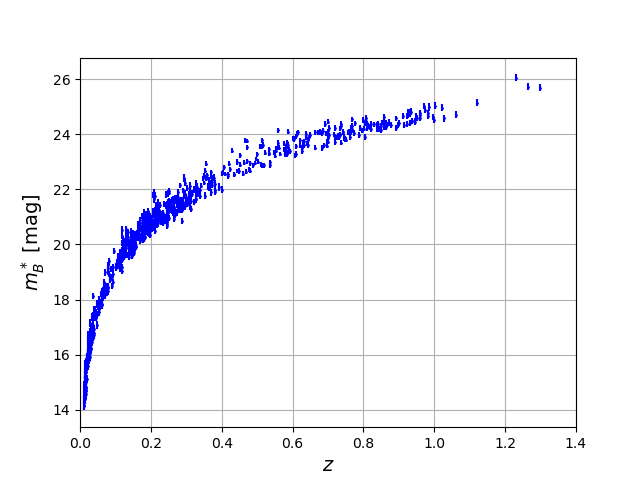

In [17]:
### BEGIN SOLUTION
fig = plt.figure()
plt.errorbar(x=df['zcmb'],y=df['mb'],xerr=np.abs(df['dz']),yerr=df['dmb'],fmt='o',color='b',markersize=1)
plt.xlabel('$z$',size='14')
plt.xlim([0.000,1.4])
plt.ylabel('$m^*_{B}$ [mag]',size='14')
plt.grid()
plt.show()
### END SOLUTION

**Define a function `mB_f(z, OmegaM, OmegaL, MB)` that returns an array of distance modules $\mu(z)+M_B$ given an array of redshifts `z`, and values for $\Omega_m^0$, $\Omega_\Lambda^0$ and $M_B$.** 

**Hint: Use the [`astropy.cosmology`](https://docs.astropy.org/en/stable/cosmology/) library to set a `LambdaCDM` cosmology with common values for cosmological parameters and get the luminosity distance. If needed, to set a `Quantity` of 1 parcec, use `1e-6 * u.megaparsec` thanks to [astropy.units](https://docs.astropy.org/en/stable/units/) or to set quantities in magnitude use `u.mag`.**

In [9]:
### BEGIN SOLUTION
from astropy.cosmology import LambdaCDM
MB = -19.08 # * u.mag

def mB_f(z, OmegaM, OmegaL, MB):
    cosmo = LambdaCDM(Om0=OmegaM, Ode0=OmegaL, H0=70)
    return 5*np.log10(cosmo.luminosity_distance(z)/(1e-5*u.megaparsec)) + MB
    # return cosmo.distmod(z) + MB

def mB_f_alternative(z, OmegaM, OmegaL, MB):
    cosmo = LambdaCDM(Om0=OmegaM, Ode0=OmegaL, H0=70)
    # return 5*np.log10(cosmo.luminosity_distance(z)/(1e-5*u.megaparsec)) + MB
    return cosmo.distmod(z) + MB * u.mag


z = np.linspace(0.01, 1.4, 50)
mB = mB_f(z, 0.3, 0.7, MB)
### END SOLUTION

**Superimpose your prediction for $m^*_{B}$ on the Hubble diagram. Be curious and test other models, like ones without dark energy. Comment.**

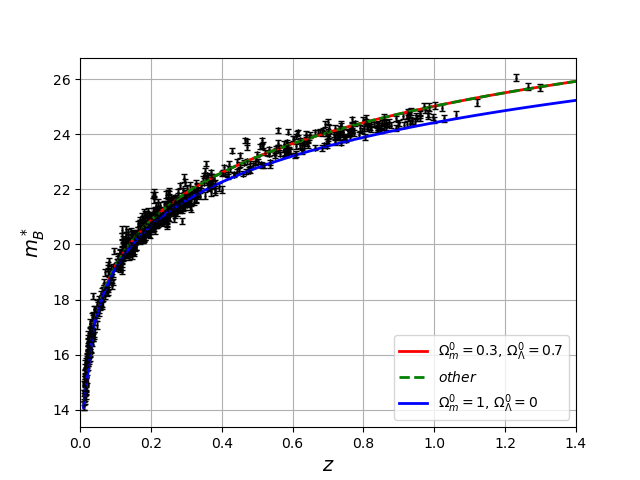

In [18]:
### BEGIN SOLUTION
fig = plt.figure()
plt.errorbar(x=df['zcmb'],y=df['mb'],xerr=np.abs(df['dz']),yerr=df['dmb'],fmt='.',capsize=2,lw=1,color='k',markersize=1)
plt.plot(z, mB_f(z, 0.3, 0.7, MB),'r-',lw=2, label=f"$\Omega_m^0=0.3$, $\Omega_\Lambda^0=0.7$")
plt.plot(z, mB_f_alternative(z, 0.3, 0.7, MB),'g--',lw=2, label=f"$other$")
plt.plot(z, mB_f(z, 1, 0., MB),'b-',lw=2, label=f"$\Omega_m^0=1$, $\Omega_\Lambda^0=0$")
plt.xlabel('$z$',size=14)
plt.xlim([0.000,1.4])
plt.ylabel('$m^*_{B}$',size=14)
plt.legend()
plt.grid()
plt.show()
### END SOLUTION

**Use the `scipy.optimize` function [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to adjust your model to data.**

In [14]:
### BEGIN SOLUTION
from scipy.optimize import curve_fit

pval, pcov = curve_fit(mB_f, df['zcmb'], df['mb'], sigma=df['dmb'], p0=(0.3,0.7,-19), absolute_sigma=True)
print(pval)
### END SOLUTION

[  0.37477064   0.32215567 -19.05026834]


**To check the quality of the fit, compute the array of residuals of your best-fit model and plot them as a function of redshift. Then compute the RMS of the residuals and the total $\chi^2$. Compare the latter with the number of measurements.**

In [15]:
### BEGIN SOLUTION
delta =  df['mb'] - mB_f(df['zcmb'], *pval)
chisq =  delta**2/df['dmb']**2

# Fit control table
RMS =                 np.std(delta)
total_chisq =         np.sum(chisq)
####

print('RMS: ',RMS)
print('Total chisq: ',total_chisq)
### END SOLUTION

RMS:  0.2804582160616442
Total chisq:  4578.591303147013


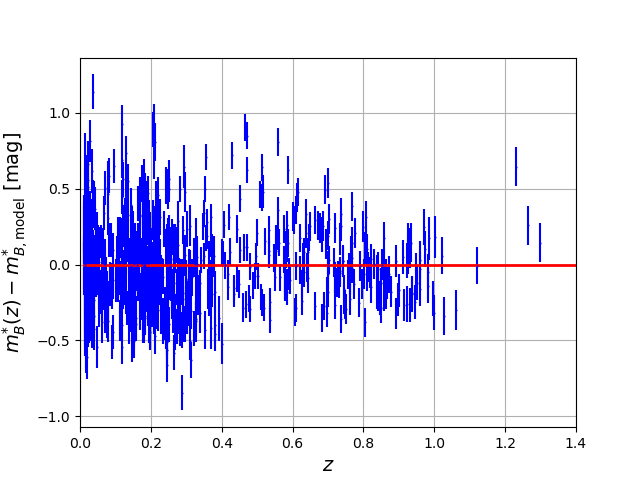

In [16]:
### BEGIN SOLUTION
fig = plt.figure()
plt.errorbar(x=df['zcmb'],y=delta,xerr=np.abs(df['dz']),yerr=df['dmb'],fmt='.',color='b',markersize=1)
plt.plot(z,np.zeros_like(z),'r-',lw=2)
plt.xlabel('$z$',size='14')
plt.xlim([0.000,1.4])
plt.ylabel('$m^{*}_{B}(z) - m^{*}_{B,\mathrm{model}}$ [mag]',size='14')
plt.grid()
plt.show()
### END SOLUTION

**Comment the value of `total_chisq` and `RMS`.**

The total value of `total_chisq` is huge compared to 740 : it means that the fit is bad even for a good-looking fit on the plot. The spread of data around the model is too important: `RMS` is around 0.3 mag.

**Check that changing the $H_0$ value does not modify the best fit cosmological parameters but only the constant $M_B$.**

## Corrected magnitudes

Actually, the type Ia supernovae are not so standard but standarisable. They have a supplementary variability that depends on their color and their duration (Astier et al. 2001). For instance, the longer is the supernovae the brighter it is also (the *brighter-slower* rule). These systematic bias can be removed to increase the quality of the data sample.

In the data file, the `color` column gives the $B-V$ color and the "stretch" parameter `x1` measures the duration of the supernova. They are given with their uncertainties.


**First, draw a scatter plot of your best-fit residuals versus `color`. Add the uncertainties and fit the residuals with a line: $m_B^*-\texttt{mb} \,\equiv\,  \beta\, \texttt{color} + C$ (you can use [`numpy.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)). Plot the best fit line and comment on how to correct your magnitude model.**

In [19]:
### BEGIN SOLUTION
fit,cov = np.polyfit(   x=df['color'],y=delta,deg=1,    cov=True,w=1/df['dcolor'])
beta =            fit[0]
beta_err =        np.sqrt(cov[0,0])
####

line_beta = np.polyval(fit, df['color'])
print('Beta value: ',beta,' +/- ',beta_err)
### END SOLUTION

Beta value:  2.7342107713928945  +/-  0.08755146655949557


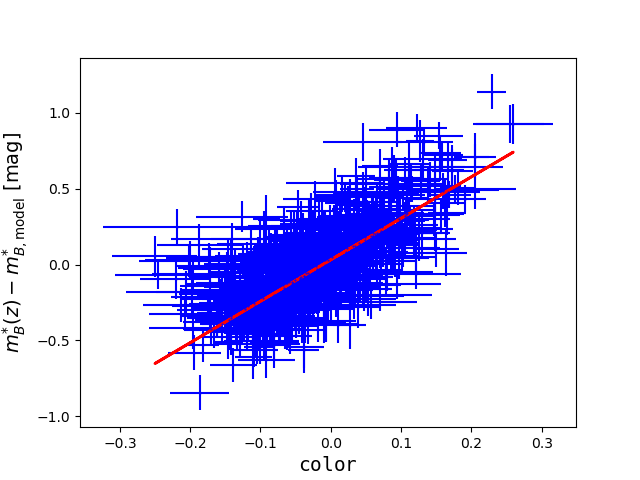

In [20]:
### BEGIN SOLUTION
fig = plt.figure()
ax = fig.add_subplot(111)
plt.errorbar(x=df['color'], y=delta, xerr=df['dcolor'],yerr=df['dmb'], fmt='.',color='b',markersize=1)
plt.plot(df['color'], line_beta, 'r-', lw=2)
ax.set_xlabel('$\mathtt{color}$', size='14')
ax.set_ylabel('$m^{*}_{B}(z)- m^{*}_{B,\mathrm{model}}$ [mag]', size='14')
plt.show()
### END SOLUTION

### BEGIN SOLUTION
We see a systematic trend between the data points: it means that the supernovae are not so standard and that their magnitude depends on un-modelled physical properties. The fit gives $m_B^*-\texttt{mag} \approx -2.5 \,\texttt{color}$ (the *brighter-bluer* rule).
### END SOLUTION

**Then, draw a scatter plot of your best-fit residuals versus `x1`. Add the uncertainties and fit the residuals with a line: $m_B^*-\texttt{mb}\, \equiv \,  \alpha\, \texttt{x1} + C$. Plot the best fit line and comment on how to correct your magnitude model.**

In [30]:
### BEGIN SOLUTION
fit,cov = np.polyfit(  x=df['x1'],y=delta,deg=1,cov=True,w=1/df['dmb'])
alpha =            fit[0]
alpha_err =        np.sqrt(cov[0,0])
####

line_alpha = np.polyval(fit, df['x1'])
print('Alpha value: ',alpha,' +/- ',alpha_err)
### END SOLUTION

Alpha value:  -0.11287006171148542  +/-  0.009782988771903662


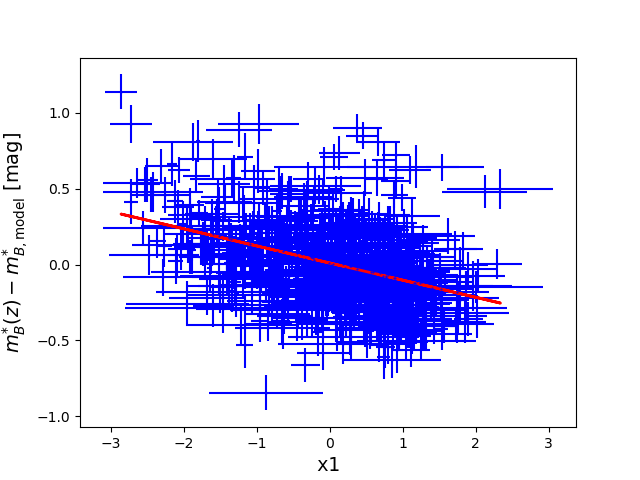

In [31]:
### BEGIN SOLUTION
fig = plt.figure()
ax = fig.add_subplot(111)
plt.errorbar(x=df['x1'], y=delta, xerr=df['dx1'],yerr=df['dmb'], fmt='.',color='b',markersize=1)
plt.plot(df['x1'], line_alpha, 'r-', lw=2)
ax.set_xlabel('$\mathtt{x1}$', size='14')
ax.set_ylabel('$m^{*}_{B}(z)- m^{*}_{B,\mathrm{model}}$ [mag]', size='14')
plt.show()
### END SOLUTION

### BEGIN SOLUTION
We see a systematic trend between the data points: it means that the supernovae are not so standard and that their magnitude depends on un-modelled physical properties. The fit gives $m_B^*-\texttt{mab} \approx 0.125\, \texttt{x1}$.
### END SOLUTION

**Propose a way to correct the measured magnitudes in order to remove the systematic trends that we observe. Fill an array `mb_corr` with your proposition, and a array `mb_corr_err` with the propagated uncertainties.**

In [32]:
### BEGIN SOLUTION
mb_corr = df['mb'] - alpha*df['x1'] - beta*df['color']
mb_corr_err = np.sqrt(df['dmb']**2+(alpha*df['dx1'])**2+(beta*df['dcolor'])**2)
### END SOLUTION

**Make a new Hubble diagram using these corrected magnitudes and superimpose your cosmological model. Compute again the residuals and $\chi^2$ as previously for this new fit. Comment.**

[  0.25164219   0.63294549 -19.07832414]
Corrected RMS:  0.16114026186131503
Corrected total chisq:  663.2606215791627


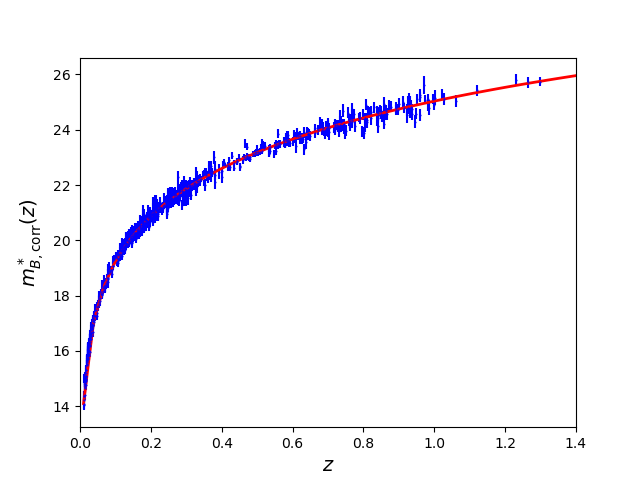

In [33]:
### BEGIN SOLUTION
pval, pcov = curve_fit(mB_f, df['zcmb'], mb_corr, sigma=mb_corr_err, p0=(0.3,0.7,-19), absolute_sigma=True)
print(pval)

#### To complete
delta_corr = mb_corr - mB_f(df['zcmb'], *pval)
chisq_corr = delta_corr**2/mb_corr_err**2

# Fit control table
RMS_corr =                 np.std(delta_corr)
total_chisq_corr =         np.sum(chisq_corr)
####

print('Corrected RMS: ',RMS_corr)
print('Corrected total chisq: ',total_chisq_corr)

fig = plt.figure()
plt.errorbar(x=df['zcmb'], y=mb_corr,xerr=np.abs(df['dz']),yerr=mb_corr_err,fmt='.',color='b',markersize=1)
plt.plot(z, mB_f(z, *pval),'r-',lw=2)
plt.xlabel('$z$',size='14')
plt.xlim([0.000,1.4])
plt.ylabel('$m^*_{B,\mathrm{corr}}(z)$',size='14')
plt.show()
### END SOLUTION

**What are the best fit values for $\Omega_m^0$ and $\Omega_\Lambda^0$ and their uncertainties?**

In [34]:
### BEGIN SOLUTION
print(f"OmegaM: {pval[0]:.3f}+/-{np.sqrt(pcov[0,0]):.3f}")
print(f"OmegaL: {pval[1]:.3f}+/-{np.sqrt(pcov[1,1]):.3f}")
### END SOLUTION

OmegaM: 0.252+/-0.076
OmegaL: 0.633+/-0.123


**Plot the new residuals.**

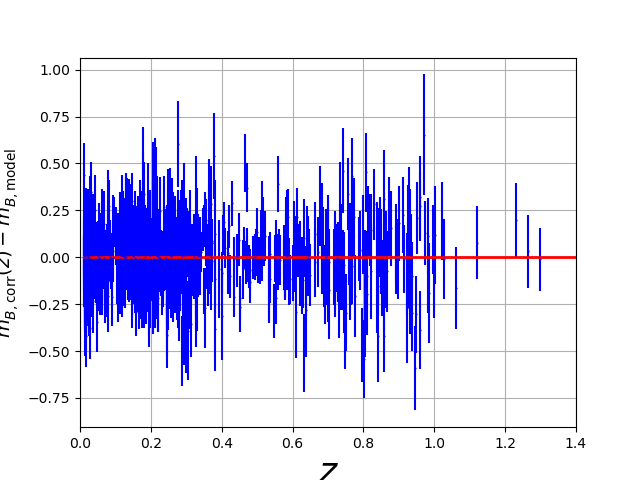

In [35]:
### BEGIN SOLUTION
fig = plt.figure()
plt.errorbar(x=df["zcmb"], y=delta_corr, xerr=np.abs(df['dz']), yerr=mb_corr_err, fmt='.', color='b', markersize=1)
plt.plot(z,np.zeros_like(z),'r-',lw=2)
plt.xlabel('$z$',size='25')
plt.xlim([0.000,1.4])
plt.ylabel('$m^{*}_{B,\mathrm{corr}}(z) - m^{*}_{B,\mathrm{model}}$',size='14')
plt.grid()
plt.show()
### END SOLUTION

## Full model

The full model contains the cosmological models but also the nuisance parameters $\alpha$ and $\beta$ that have to be fitted on data together.

**Write a function `chisq_LCDM(Omega_m,Omega_L,alpha,beta,MB)` that returns the total $\chi^2$, using most of the previous code.**


Omega_m:  0.3  Omega_L:  0.6  Omega_k:  0.09999999999999998
alpha:  -0.123  beta:  2.5  MB:  -19.08
Corrected RMS:  0.16003191049372598
Corrected total chisq:  715.6642284044394


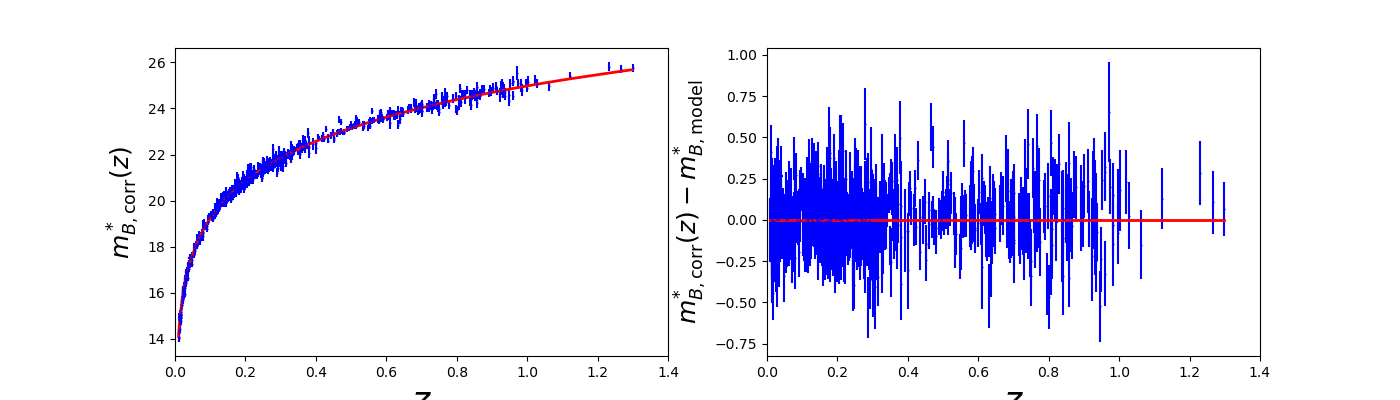

In [36]:
### BEGIN SOLUTION
Omega_m_test =  0.3
Omega_L_test = 0.6
Omega_k_test = 1 - Omega_m_test - Omega_L_test
alpha_test = -0.123
beta_test = 2.5
MB_test = -19.08
####

def chisq_LCDM(Omega_m,Omega_L,alpha,beta,MB,plot=False,verbose=False):
    mag_test = mB_f(df['zcmb'], Omega_m, Omega_L, MB)

    mb_corr_test = df['mb'] - alpha*df['x1'] - beta*df['color']
    mb_corr_err_test = np.sqrt(df['dmb']**2+(alpha*df['dx1'])**2+(beta*df['dcolor'])**2)

    delta_corr_test =      mb_corr_test - mag_test
    chisq_corr_test =     delta_corr_test**2/(mb_corr_err_test**2)
    RMS_corr_test =                 np.std(delta_corr_test)
    total_chisq_corr_test =         np.sum(chisq_corr_test)
    if verbose :
        print('Omega_m: ',Omega_m,' Omega_L: ',Omega_L,' Omega_k: ',1-Omega_m-Omega_L)
        print('alpha: ',alpha,' beta: ',beta,' MB: ',MB)
        print('Corrected RMS: ',RMS_corr_test)
        print('Corrected total chisq: ',total_chisq_corr_test)

    if plot :
        fig = plt.figure(figsize=(14,4))
        ax = fig.add_subplot(1,2,1)
        plt.errorbar(x=df['zcmb'],y=mb_corr_test,xerr=np.abs(df['dz']),yerr=mb_corr_err_test,fmt='.',color='b',markersize=1)
        plt.plot(df['zcmb'], mag_test,'r-',lw=2)
        ax.set_ylabel('$m^*_{B,\mathrm{corr}}(z)$',size='18')
        ax.set_xlabel('$z$',size='25')
        ax.set_xlim([0.000,1.4])

        ax2 = fig.add_subplot(1,2,2)
        plt.errorbar(x=df['zcmb'],y=delta_corr_test,xerr=np.abs(df['dz']),yerr=mb_corr_err_test,fmt='.',color='b',markersize=1)
        plt.plot(df['zcmb'],np.zeros_like(df['zcmb']),'r-',lw=2)
        ax2.set_xlabel('$z$',size='25')
        ax2.set_xlim([0.000,1.4])
        ax2.set_ylabel('$m^{*}_{B,\mathrm{corr}}(z) - m^{*}_{B,\mathrm{model}}$',size='18')
        plt.show()
    return(total_chisq_corr_test)
####

chi2 = chisq_LCDM(Omega_m_test,Omega_L_test,alpha_test,beta_test,MB_test,plot=True,verbose=True)
### END SOLUTION

**Vary the $\alpha$, $\beta$, $\mathcal{M}$ and cosmological parameters and check that you found the best fitting model.**

/var/folders/jk/kyldbk_95pl2fc_t8qb_l8580000gw/T/ipykernel_54522/1527401885.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


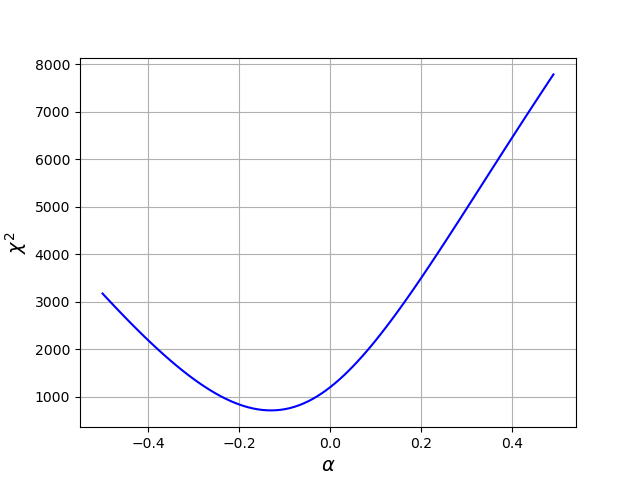

In [37]:
alpha_arr = np.arange(-0.5, 0.5, 0.01)

chisq_arr = []
for alpha_val in alpha_arr:
    chi2 = chisq_LCDM(Omega_m_test,Omega_L_test,alpha_val,beta_test,MB_test,plot=False,verbose=False)
    chisq_arr.append(chi2)
    
fig = plt.figure()
plt.plot(alpha_arr, chisq_arr, 'b-')
plt.xlabel(r'$\alpha$', size=14)
plt.ylabel(r'$\chi^2$', size=14)
plt.grid()
plt.show()

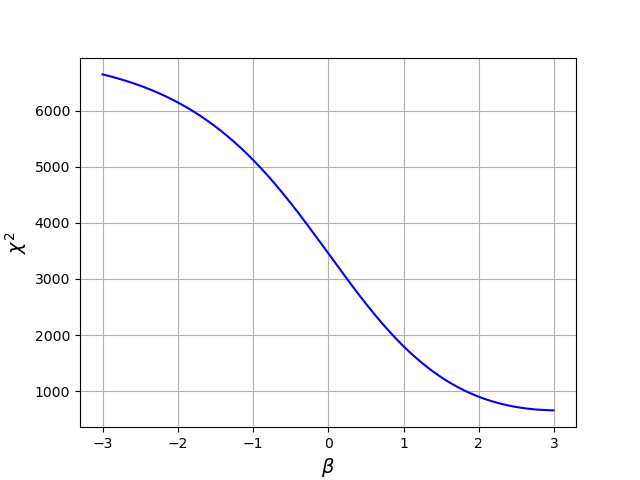

In [39]:
beta_arr = np.arange(-3, 3, 0.01)

chisq_arr = []
for beta_val in beta_arr:
    chi2 = chisq_LCDM(Omega_m_test,Omega_L_test,alpha_test,beta_val,MB_test,plot=False,verbose=False)
    chisq_arr.append(chi2)
    
fig = plt.figure()
plt.plot(beta_arr, chisq_arr, 'b-')
plt.xlabel(r'$\beta$', size=14)
plt.ylabel(r'$\chi^2$', size=14)
plt.grid()
plt.show()

## Testing the flat $\Lambda$CDM model

The goal now is to estimate the best fit parameter for the *flat* $\Lambda$CDM model from data. This cosmological model has only one free parameter, $\Omega_m^0$, as we have $\Omega_\Lambda^0 = 1 - \Omega_m^0$. Using the supernova data, we want to obtain the probability density function of $\Omega_m^0$ given the observed supernovae.

The Bayes theorem gives:
\begin{equation}
\mathrm{PDF}(\Omega_m^0 \vert \mathrm{data}) = \frac{ \mathrm{PDF}(\mathrm{data} \vert \Omega_m^0) \mathrm{PDF}(\Omega_m^0)} { \mathrm{PDF}(\mathrm{data})}
\end{equation}
$\mathrm{PDF}(\mathrm{data})$ and $\mathrm{PDF}(\Omega_m^0)$ corresponds to prior knowledge of the given quantities, which are usually assumed to be flat in cosmology (no information about $\Omega_m^0$ before the fit). The likelihood function is defined as the probability to observe a dataset in a particular model:
\begin{equation}
\mathcal{L}(\Omega_m^0) \equiv  \mathrm{PDF}(\mathrm{data} \vert \Omega_m^0)
\end{equation}
Assuming Gaussian probabilities, this function can be evaluated by:
\begin{equation}
\mathcal{L}(\Omega_m^0)  \propto e^{-\chi^2(\Omega_m^0) / 2}
\end{equation}
Then in this simple way the probability density function of $\Omega_m^0$ is the likelihood function normalised to unity. See https://npac.ijclab.in2p3.fr/wp-content/uploads/2024/COURS/Sem1/statistics/NPAC_Statistics_2024_25.pdf 


**First, test flat Einstein-de Sitter models with different values of $\Omega_m^0$ and remark that such a model is incompatible with data whatever value for its parameters: you need dark energy!**

### BEGIN SOLUTION
We fix $\Omega_\Lambda^0$ to zero, and vary $\Omega_m^0$. The model seems to never agree with data even with a low amount of matter. The $\chi^2$ remains huge, so the Einstein-de Sitter model is not probable in such observed universe. That's why cosmologists rediscovered the cosmological constant and thus dark energy.
### END SOLUTION

Omega_m:  0  Omega_L:  0.0  Omega_k:  1.0
alpha:  -0.11287006171148542  beta:  2.7342107713928945  MB:  -19.08
Corrected RMS:  0.16471870750228665
Corrected total chisq:  882.9431957076563


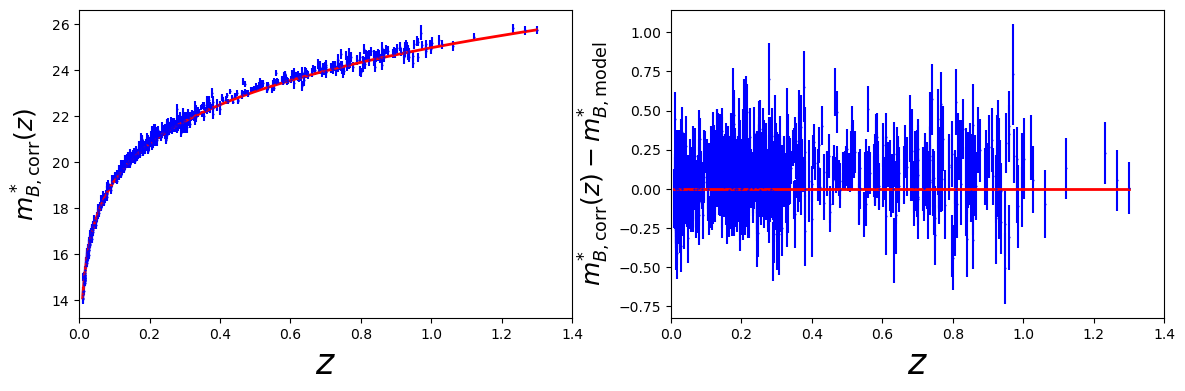

In [35]:
### BEGIN SOLUTION
Omega_m_test = 0
Omega_L_test = 0.0
Omega_k_test = 1 - Omega_m_test

chi2 = chisq_LCDM(Omega_m_test,Omega_L_test,alpha,beta,MB,plot=True,verbose=True)

### END SOLUTION

**Now, for a flat $\Lambda$CDM model, initialize a $\Omega_m^0$ array between 0.25 and 0.4. Compute the corresponding $\Omega_\Lambda^0$ array in the flat case. Then for these sets of parameters, compute and plot the likelihood function $\mathcal{L}(\Omega_m^0)$. What is the best fit value of $\Omega_m^0$ and its uncertainty?**

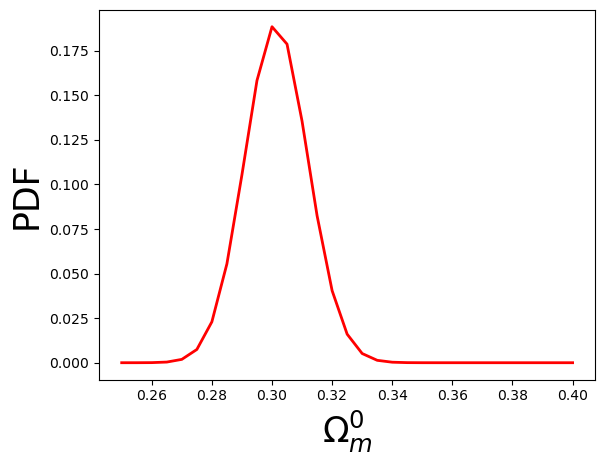

In [36]:
### BEGIN SOLUTION
Omega_ms = np.arange(0.25,0.4,0.005)
Omega_Ls = 1-Omega_ms

chisqs = np.zeros_like(Omega_ms)
for i in range(len(Omega_ms)):
    chisqs[i] = chisq_LCDM(Omega_ms[i],Omega_Ls[i],alpha,beta,MB,plot=False,verbose=False)

PDF = np.exp(-0.5*chisqs)
PDF /= np.sum(PDF)
####
    
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Omega_ms,PDF,'r-',lw=2)
ax.set_xlabel('$\Omega_m^0$',size='25')
ax.set_ylabel('PDF',size='25')
plt.show()
### END SOLUTION

### BEGIN SOLUTION
The PDF is Gaussian-like and maximum is obtained for $\Omega_m^0 = 0.31$. The $1\sigma=68\%$ uncertainty is roughly $\pm0.02$ looking at the PDF width.
### END SOLUTION

# Testing the $\Lambda$CDM model

**Reproduce Figure 14 from https://arxiv.org/abs/1401.4064 , computing the 2D PDF $\mathcal{L}(\Omega_m^0, \Omega_\Lambda^0)$.**


In [41]:
### BEGIN SOLUTION
Omega_ms = np.arange(0.1,0.5,0.01)
Omega_Ls = np.arange(0.3,1,0.01)

chisqs = np.zeros((Omega_ms.size,Omega_Ls.size))
for i in range(len(Omega_ms)):
    for j in range(len(Omega_Ls)):
        chisqs[i][j] = chisq_LCDM(Omega_ms[i],Omega_Ls[j],alpha,beta,MB,plot=False,verbose=False)
PDF = np.exp(-0.5*chisqs)
PDF /= np.sum(PDF)
### END SOLUTION

**You can add the 68% and 95% probability contours with `matplotlib.contours`. The first one stands where $\Delta \chi^2 = \chi^2(\Omega_m^0, \Omega_\Lambda^0) - min(\chi^2(\Omega_m^0, \Omega_\Lambda^0))$ is 2.3, and the second one for 5.99 (see table 40.2 https://pdg.lbl.gov/2020/reviews/rpp2020-rev-statistics.pdf). Add the line on the plot where $\Omega_k^0 = 0$.**

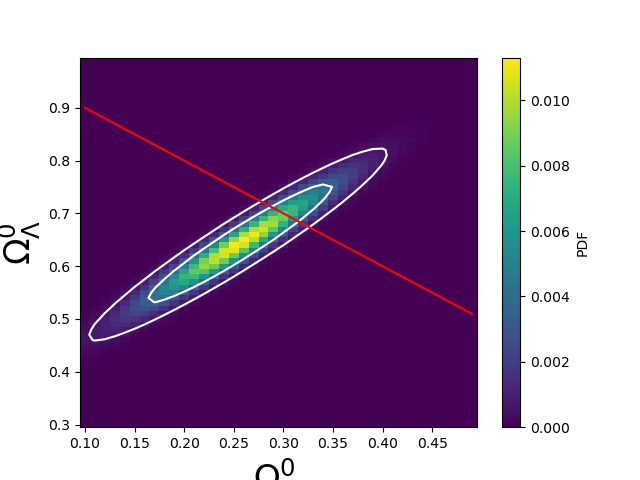

In [42]:
### BEGIN SOLUTION
fig = plt.figure()
cs=plt.pcolormesh(Omega_ms, Omega_Ls, PDF.T)
plt.contour(Omega_ms, Omega_Ls, chisqs.T-np.min(chisqs), colors="white",levels=[2.3, 5.99])
plt.plot(Omega_ms, 1 - Omega_ms, color="r")
plt.colorbar(cs, label='PDF')
plt.xlabel('$\Omega_m^0$',size='25')
plt.ylabel('$\Omega_\Lambda^0$',size='25')
plt.show()
### END SOLUTION

## Testing flat $w$CDM model

**If you have time, test the flat $w$CDM model, like Figure 15.**

Omega_m:  0.3  w:  -1  Omega_k:  0
alpha:  -0.123  beta:  2.5  MB:  -19.08
Corrected RMS:  0.15952977704819057
Corrected total chisq:  704.4494704266044


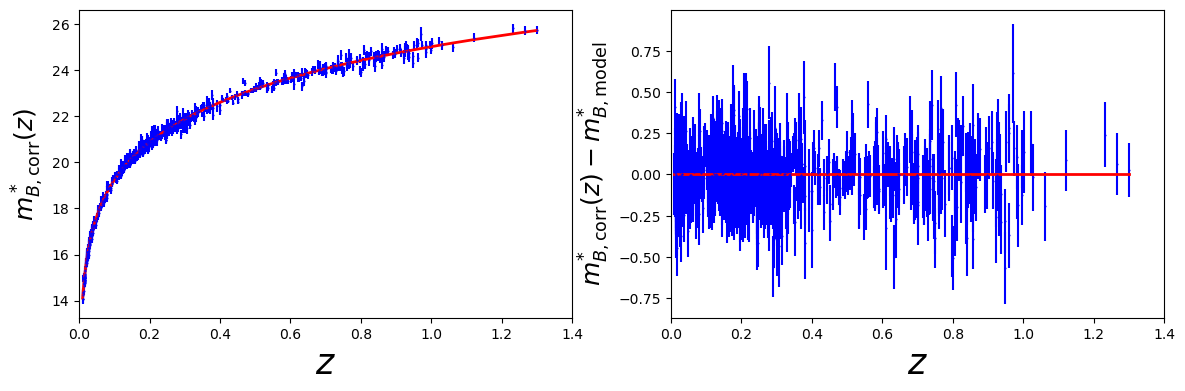

In [39]:
### BEGIN SOLUTION
from astropy.cosmology import FlatwCDM

def chisq_FWCDM(Omega_m,w,alpha,beta,MB,plot=False,verbose=False):
    cosmo = FlatwCDM(Om0=Omega_m, w0=w, H0=70)
    mag_test = 5*np.log10(cosmo.luminosity_distance(df['zcmb'])/(1e-5*u.megaparsec)) + MB

    mb_corr_test = df['mb'] - alpha*df['x1'] - beta*df['color']
    mb_corr_err_test = np.sqrt(df['dmb']**2+(alpha*df['dx1'])**2+(beta*df['dcolor'])**2)

    delta_corr_test =      mb_corr_test - mag_test
    chisq_corr_test =     delta_corr_test**2/(mb_corr_err_test**2)
    RMS_corr_test =                 np.std(delta_corr_test)
    total_chisq_corr_test =         np.sum(chisq_corr_test)
    if verbose :
        print('Omega_m: ',Omega_m,' w: ',w,' Omega_k: ',0)
        print('alpha: ',alpha,' beta: ',beta,' MB: ',MB)
        print('Corrected RMS: ',RMS_corr_test)
        print('Corrected total chisq: ',total_chisq_corr_test)

    if plot :
        fig = plt.figure(figsize=(14,4))
        ax = fig.add_subplot(1,2,1)
        plt.errorbar(x=df['zcmb'],y=mb_corr_test,xerr=np.abs(df['dz']),yerr=mb_corr_err_test,fmt='.',color='b',markersize=1)
        plt.plot(df['zcmb'], mag_test,'r-',lw=2)
        ax.set_ylabel('$m^*_{B,\mathrm{corr}}(z)$',size='18')
        ax.set_xlabel('$z$',size='25')
        ax.set_xlim([0.000,1.4])

        ax2 = fig.add_subplot(1,2,2)
        plt.errorbar(x=df['zcmb'],y=delta_corr_test,xerr=np.abs(df['dz']),yerr=mb_corr_err_test,fmt='.',color='b',markersize=1)
        plt.plot(df['zcmb'],np.zeros_like(df['zcmb']),'r-',lw=2)
        ax2.set_xlabel('$z$',size='25')
        ax2.set_xlim([0.000,1.4])
        ax2.set_ylabel('$m^{*}_{B,\mathrm{corr}}(z) - m^{*}_{B,\mathrm{model}}$',size='18')
        plt.show()
    return(total_chisq_corr_test)
####

chi2 = chisq_FWCDM(0.3,-1,alpha_test,beta_test,MB_test,plot=True,verbose=True)
### END SOLUTION

In [40]:
### BEGIN SOLUTION
Omega_ms = np.arange(0.1,0.5,0.01)
ws = np.arange(-1.5, -0.5, 0.01)

chisqs = np.zeros((Omega_ms.size,ws.size))
for i in range(len(Omega_ms)):
    for j in range(len(ws)):
        chisqs[i][j] = chisq_FWCDM(Omega_ms[i],ws[j],alpha,beta,MB,plot=False,verbose=False)
PDF = np.exp(-0.5*chisqs)
PDF /= np.sum(PDF)
### END SOLUTION

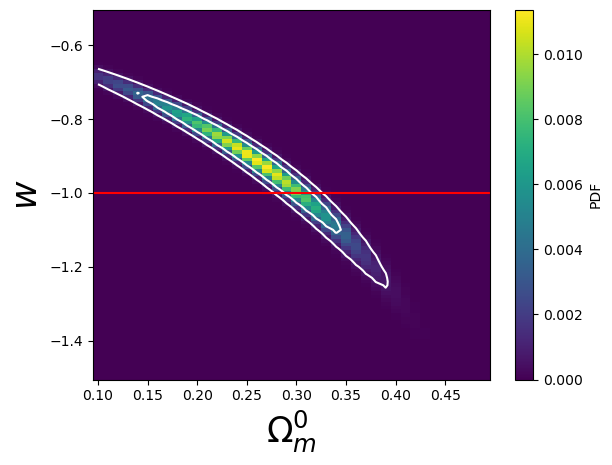

In [41]:
### BEGIN SOLUTION
fig = plt.figure()
cs=plt.pcolormesh(Omega_ms, ws, PDF.T)
plt.contour(Omega_ms, ws, chisqs.T-np.min(chisqs), colors="white",levels=[2.3, 5.99])
plt.axhline(-1, color="r")
plt.colorbar(cs, label='PDF')
plt.xlabel('$\Omega_m^0$',size='25')
plt.ylabel('$w$',size='25')
plt.show()
### END SOLUTION